In [197]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

In [198]:
# Load the experiment data
mem = Memory("./mycache")

@mem.cache
def get_data(f):
    data = load_svmlight_file(f)    
    return data

Loss Function:
$$ L= ||W^TX-y||^2$$
Gradient Matrix:
$$ \frac{\partial L}{\partial W}=2(W^TX-y)X$$

In [199]:
def linearRegression(W, xtrain, ytrain, xtest, ytest):
  """
  Inputs:
  - W: A numpy array of shape (D_in, D_out) containing weights.
  - xtrain: A numpy array of shape (N, D_in) containing a minibatch of data.
  - ytrain: A numpy array of shape (N, D_out) containing training target value; 
  - xtest: A numpy array of shape (N2, D_in) containing test data.
  - ytest: A numpy array of shape (N2, D_out) containing test target value; 
  
  Returns a tuple of:
  - loss as single float
  - gradient with respect to weights W; an array of same shape as W
  """
  num_train = X.shape[0]
  train_loss = 0
  test_loss =0 
  dW = np.zeros(W.shape) # initialize the gradient as zero  
  ytrain_pred = np.dot(xtrain,W)  # N by 1
  ytest_pred = np.dot(xtest,W)  # N by 1
  train_loss = np.power((ytrain_pred-ytrain),2).sum()
  test_loss  = np.power((ytest_pred-ytest),2).sum()   
  grad_y= 2.0 * (ytrain_pred-ytrain)
  dW =  np.dot(xtrain.T,grad_y)/ num_train

  return train_loss, test_loss, dW

In [200]:
def predict(W , X, y ):
    """
    Inputs:
    - W: A numpy array of shape (D_in, D_out) containing weights.
    - x: A numpy array of shape (N, D_in) containing a minibatch of data.
    - y: A numpy array of shape (N, D_out) containing target value
  
    Returns a tuple of:
    - prediction of y
    - root mean squared error
    - coefficient of determination
    - degree-of-freedom adjusted coefficient of determination
    """    

    N,D_in =X.shape # N is total sample size ; D_in is the number of predictors
    y_pred= np.dot(X ,W)
    #he sum of squares due to error
    SSE =np.power((y_pred-y),2).sum()
    #Mean squared error
    MSE =SSE/N
    #Root mean squared error
    RMSE = np.sqrt(MSE)
    #Total sum of squares
    SST =np.power((y-np.mean(y_train)),2).sum()
    #Coefficient of determination
    R2=1-SSE/SST
    #Degree-of-freedom adjusted coefficient of determination
    adj_R2=1-(N-1) *(1-R2)/(N-D_in-1)
    
    return y_pred,RMSE,R2,adj_R2 

In [201]:
# Data preparation  
data = get_data(f="D:\研一\课件\深度学习\libsvm-3.22\housing_scale")

# Data preprocessing
X=data[0].toarray()
X=np.column_stack((X,np.ones([X.shape[0],1]))) #add bias 
Y=data[1]
Y=Y.reshape((len(Y),1))

In [202]:
# Devide dataset
x_train, x_validation, y_train, y_validation = train_test_split(X, Y, test_size=0.4, random_state=42)
N,D_in=x_train.shape #  D_in is input dimension; N is batch size;
D_out =y_train.shape[1] # D_out is output dimension

In [203]:
# Initialize parameter  
W = random.random(size=(D_in, D_out)) # weights
eta = 0.01 # learning rate
maxIterations=1000
L_train=[]; # train loss
L_validation=[]; #validation loss

In [204]:
# Iterations 
for t in range(maxIterations):
    # Compute loss
    train_loss, validation_loss, grad_W= linearRegression(W, x_train, y_train, x_validation, y_validation)
    
    # Save the values
    L_train.append (train_loss)
    L_validation.append (validation_loss)
    
    # Update weights using gradient descent
    W -= eta * grad_W

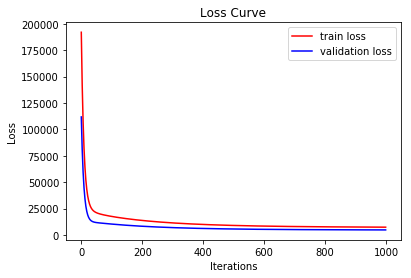

In [207]:
# Plot 
plt.plot(L_train,'r',label='train loss')
plt.plot(L_validation,'b',label='validation loss')
plt.title('Loss Curve') # give plot a title
plt.xlabel('Iterations')# make axis labels
plt.ylabel('Loss')
plt.legend()
plt.show()

In [206]:
#Assessment Result
y_train_pred,RMSE_train,R2_train,adj_R2_train=predict(W , x_train, y_train )
print('------------Assessment Results-----------\nRMSE_train=',RMSE_train,'\nR-squared_train=',R2_train,'\nadjusted R-squared_train =',adj_R2_train)
#Predicted Result
y_validation_pred,RMSE_validation,R2_validation,adj_R2_validation=predict(W , x_validation, y_validation )
print('\n------------Predicted Results------------\nRMSE_validation=',RMSE_validation,'\nR-squared_validation=',R2_validation,'\nadjusted R-squared_validation =',adj_R2_validation)

---------Assessment Results--------
RMSE_train= 4.96136623475 
R-squared_train= 0.724127965617 
adjusted R-squared_train = 0.710717519501

---------Predicted Results---------
RMSE_validation= 4.89733305645 
R-squared_validation= 0.692970318205 
adjusted R-squared_validation = 0.67010640573
